In [2]:
import numpy as np
import torch
import scipy as sp

In [3]:
import scipy
scipy.__version__

'1.9.1'

In [4]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def int_f(ff, dx=0.01):
    x=np.arange(-10, 10, dx)
    y = ff(x)
    return np.trapz(y, x=x)

def fit(true_func, fit_func, params_true, range=5, dx=0.1, p0=None, plot=False):
    x = np.arange(-range,range,dx)
    y=[]
    for b in x:
        y.append(int_f(true_func(b, *params_true)))
    if p0 is None:
        popt, pcov = curve_fit(fit_func, x, y, maxfev = 1000000)
    else:
        popt, pcov = curve_fit(fit_func, x, y, p0, maxfev = 1000000)
    #plt.plot(x, 1.7*np.log(np.cosh(x))+0.4)
    y_diff = np.abs(fit_func(x, *popt)- y)
    y_diff_rel = np.abs(fit_func(x, *popt)- y)/y

    if plot:
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

        ax1.plot(x, fit_func(x, *popt), 'r-',
                label=f'fit: {popt}')
        ax1.plot(x, y, 'b.',
                label=f'real')
        #ax2.set_ylim(0,2)
        ax2.plot(x, y_diff,
                label='diff')
        ax3.plot(x, y_diff_rel,
                label='diff rel')
        ax1.legend()
        ax2.legend()
        ax3.legend()
        for pp in popt:
            print(f"param {pp:.2}")
    return popt, pcov, y_diff, y_diff_rel

def plot_curve(true_func, params_true, range=5, dx=0.1):
    fig, ax1 = plt.subplots(1, 1, figsize=(8,5))
    x = np.arange(-range,range,dx)
    y=[]
    for b in x:
        y.append(int_f(true_func(b, *params_true)))
    #plt.plot(x, 1.7*np.log(np.cosh(x))+0.4)
    ax1.plot(x, y, 'b.',
            label=f'real')
def plot_fit(fit_funct, params, range=5, dx=0.1):
    fig, ax1 = plt.subplots(1, 1, figsize=(8,5))
    x = np.arange(-range,range,dx)
    y=[]
    for b in x:
        y.append(fit_funct(b, *params))
    #plt.plot(x, 1.7*np.log(np.cosh(x))+0.4)
    ax1.plot(x, y, 'b.',
            label=f'fit_func')




In [5]:
from scipy.special import log_expit, expit

funct_int = lambda x: np.log(np.cosh(x))
funct_int = lambda x: log_expit(x)

def f_rs(h, q0=1, beta=1, JJ=0.01):
    def f_(x):
        return 1/np.sqrt(2*np.pi*q0) * np.exp(-((x)**2)/q0) * funct_int(beta*(JJ+beta*x+h))
    return f_

def f_rs_approx(x, a, b, c, d):
    return a + b * funct_int(c*x+d)
def f_rs_approx1(x, b, c, d):
    return b * funct_int(c*x+d)



beta 0.1
param -2.7e-07
param 0.71
param 0.1
param 0.001
beta 0.1
param 1.7e-07
param 0.71
param 0.1
param 0.001
beta 0.1
param 8.3e-07
param 0.71
param 0.1
param 0.001
beta 0.1
param 1.7e-06
param 0.71
param 0.1
param 0.001
beta 1
param 4.3e-05
param 0.71
param 1.0
param 0.01
beta 1
param 0.00042
param 0.71
param 0.99
param 0.011
beta 1
param 0.0021
param 0.74
param 0.95
param 0.013
beta 1
param 0.0041
param 0.77
param 0.91
param 0.016
beta 2
param 0.00022
param 0.72
param 2.0
param 0.02
beta 2
param 0.0021
param 0.8
param 1.8
param 0.024
beta 2
param 0.011
param 1.1
param 1.3
param 0.03
beta 2
param 0.022
param 1.4
param 1.0
param 0.033


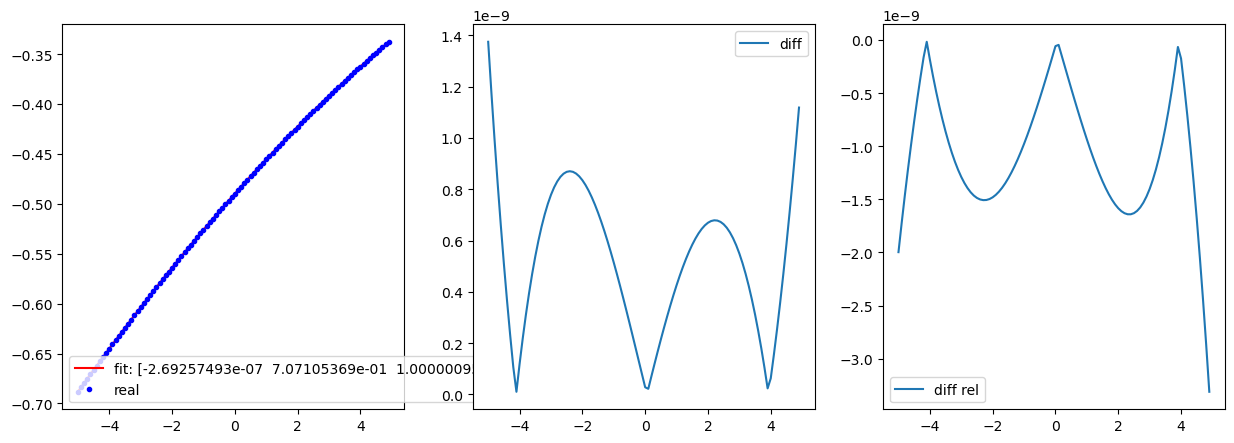

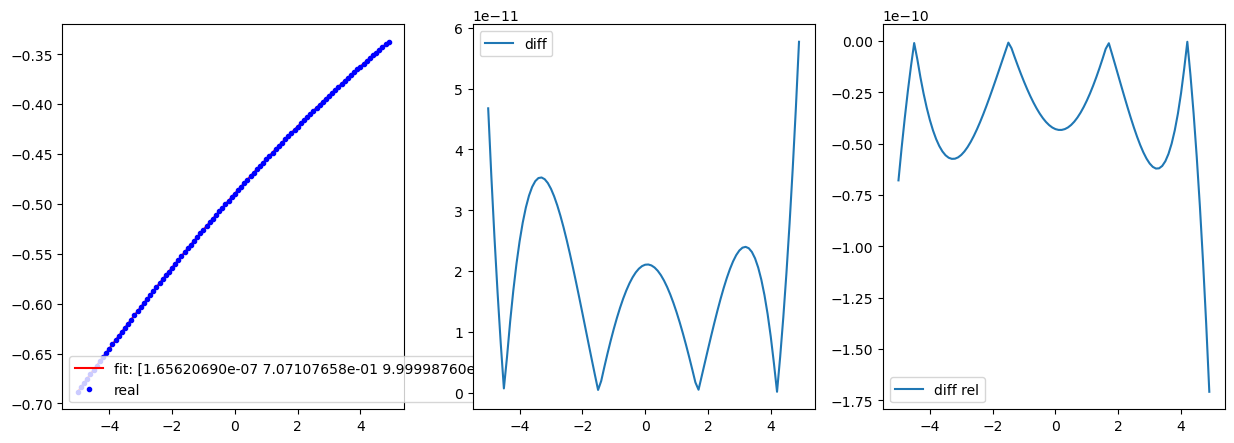

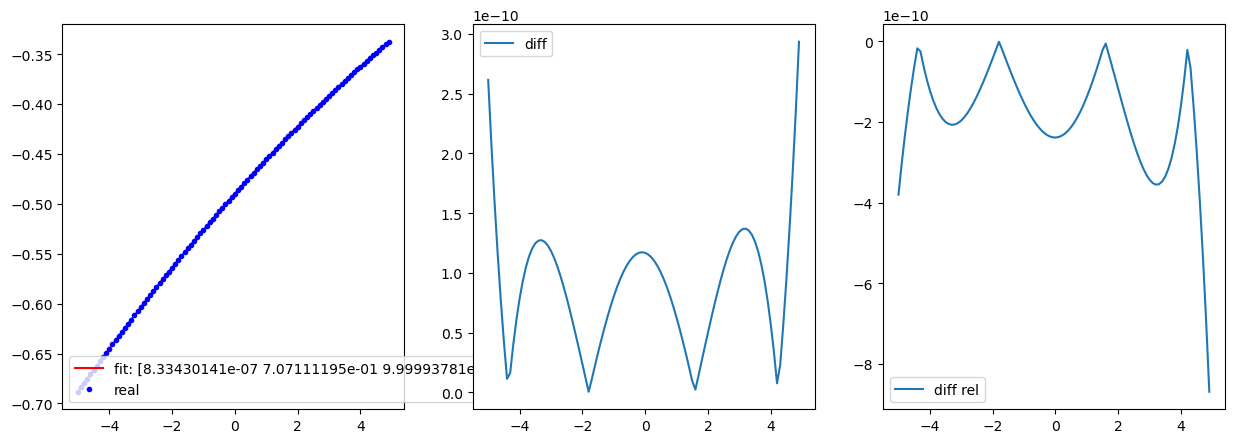

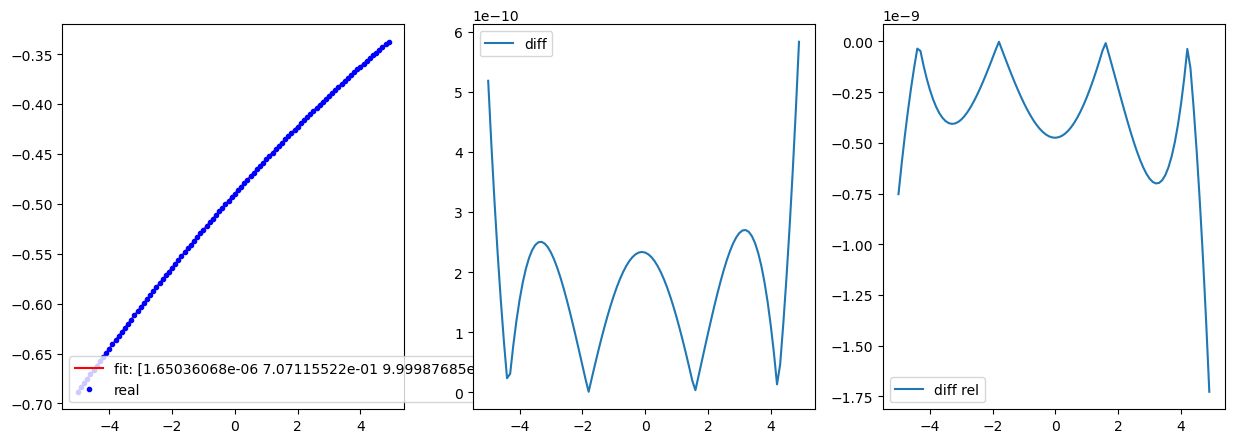

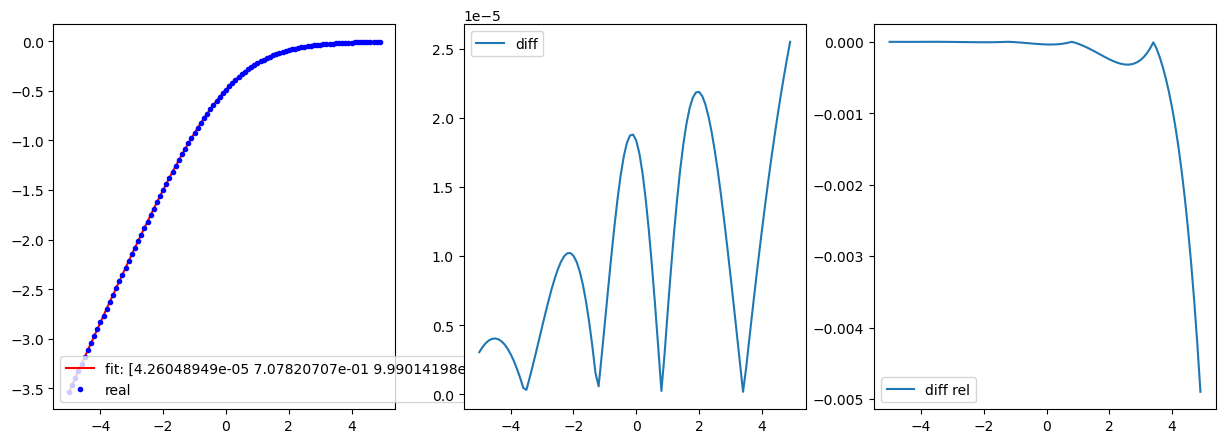

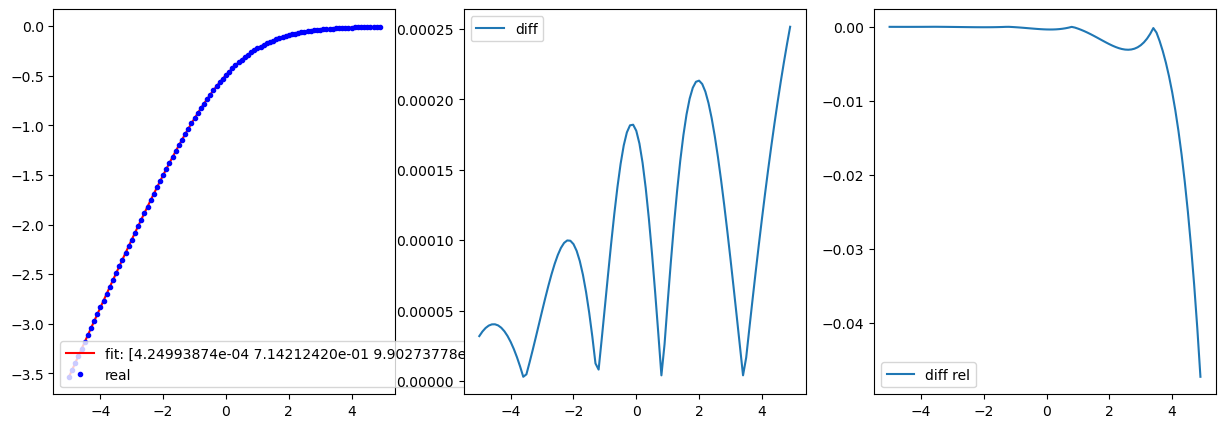

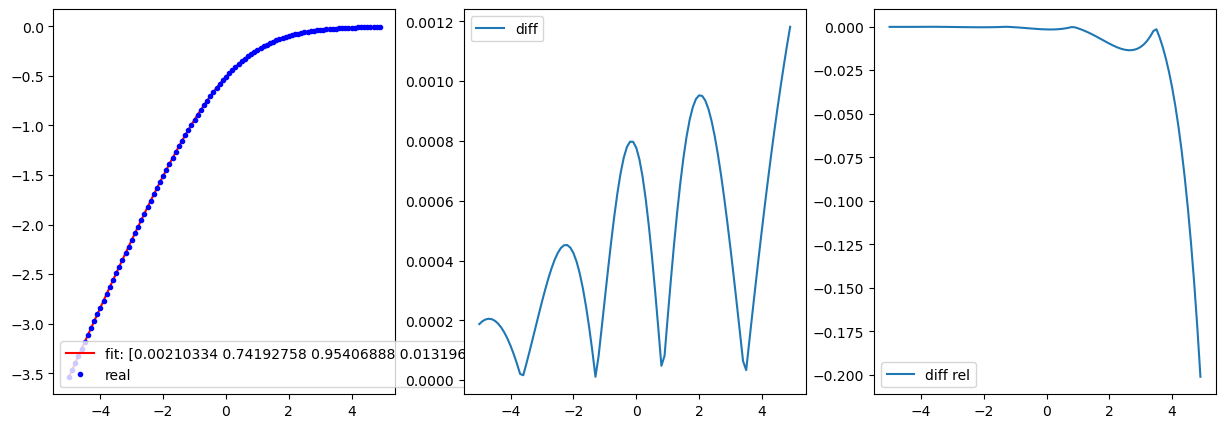

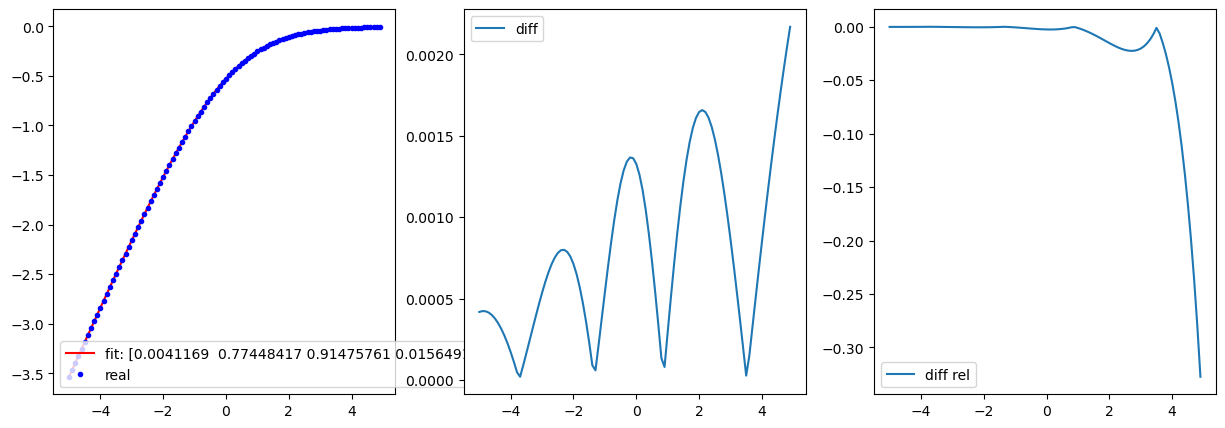

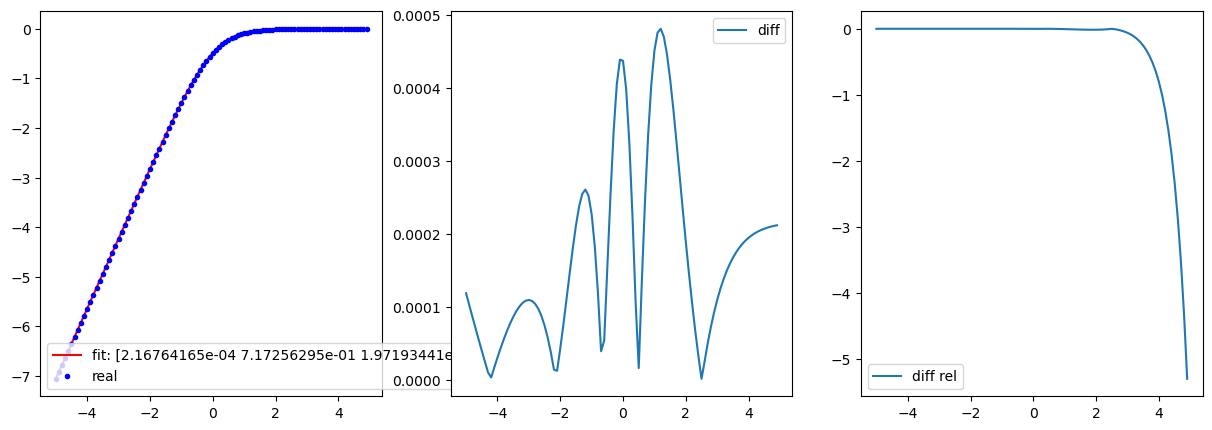

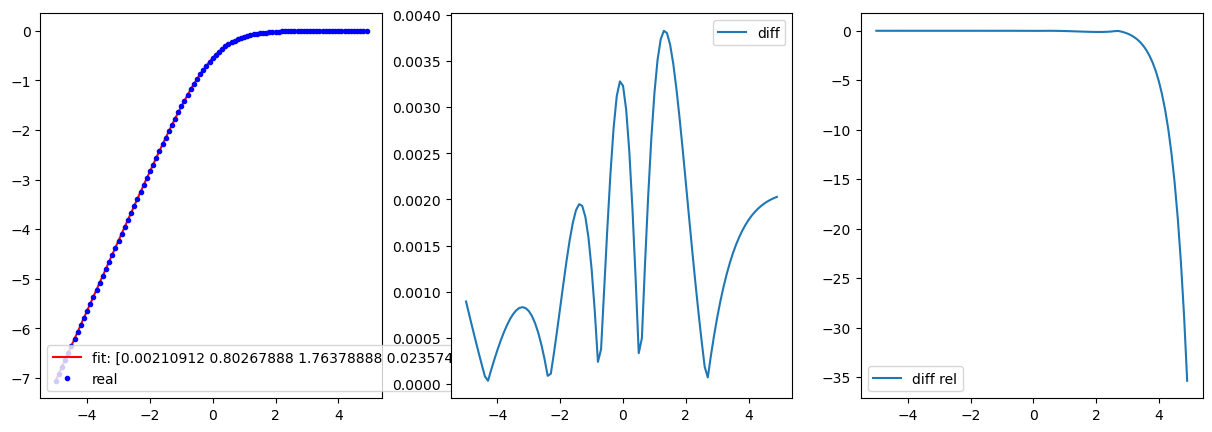

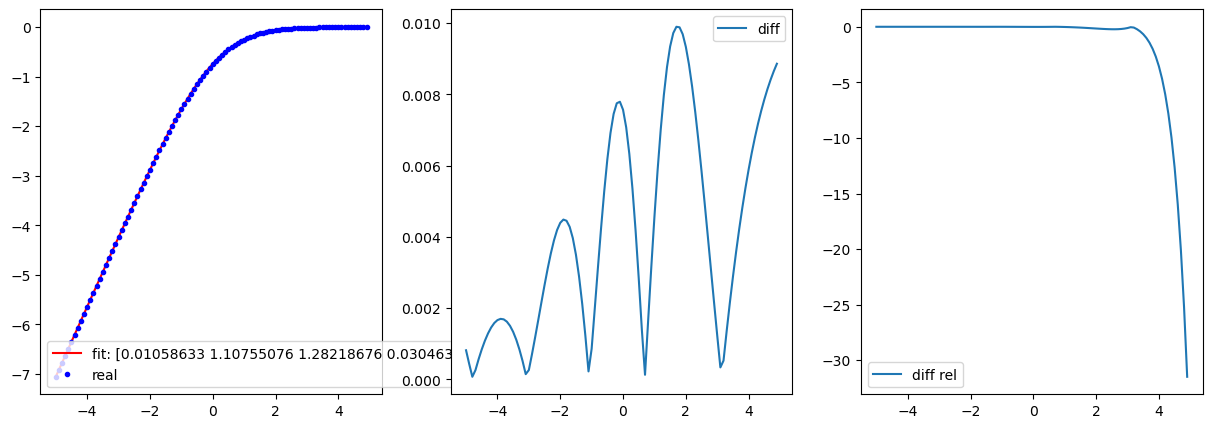

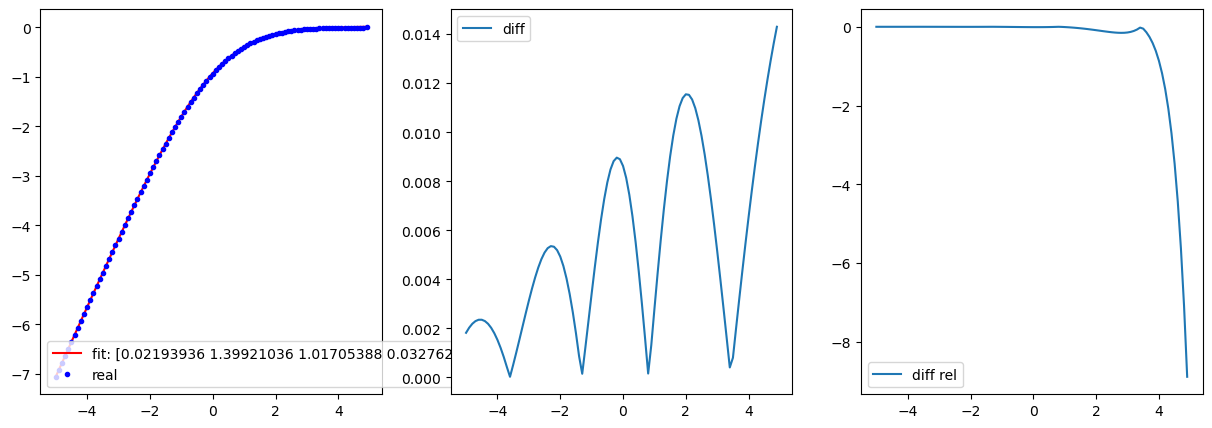

In [8]:
q0=0.001
JJ=0.01
beta=1

for beta in 0.1, 1, 2:
    for q0 in 0.01, 0.1, 0.5, 0.99:
        print(f"beta {beta}")
        popt, pcov, y_diff, y_diff_rel = fit(f_rs, f_rs_approx, [q0,beta,JJ], p0=[0.01, q0,beta,JJ], plot=True)


In [11]:
funct_int = lambda x: np.log(np.cosh(x))
funct_int = lambda x: log_expit(x)

def f_10rsb(h, q0=1, beta=1, JJ=0.01, m=1):
    def f_(x):
        return 1/np.sqrt(2*np.pi*q0) * np.exp(-((x)**2)/q0 + x - m * funct_int(beta*(JJ+beta*x+h)))
    return f_

def f_10rsb_approx(x, a0, a1, b1, a2, b2):
    return a0*(1 + np.exp(a1 + b1 * funct_int(b2*x+a2)))


beta 0.1
param 0.35
param -0.00013
param -0.16
param -0.26
param 0.1
beta 0.1
param 0.36
param -0.00075
param -0.16
param -0.26
param 0.1
beta 0.1
param 0.78
param -7.0
param -0.2
param -2.4e+01
param 0.28
beta 0.1
param 0.45
param -0.0015
param -0.16
param -0.25
param 0.1
beta 1
param 0.71
param 0.59
param 1.8e+05
param 1.1e+01
param -0.23
beta 1
param 0.73
param 0.59
param 1.8e+05
param 1.1e+01
param -0.23
beta 1
param 0.8
param 0.61
param 1.1e+05
param 1e+01
param -0.22
beta 1
param 0.91
param 0.62
param 2.3e+02
param 4.2
param -0.22
beta 2
param 0.71
param 1.5
param 2.2e+05
param 1.1e+01
param -0.28
beta 2
param 0.72
param 1.5
param 2.1e+05
param 1.1e+01
param -0.27
beta 2
param 0.8
param 1.6
param 2.8e+05
param 1.1e+01
param -0.25
beta 2
param 0.91
param 1.8
param 3.1e+05
param 1.1e+01
param -0.22


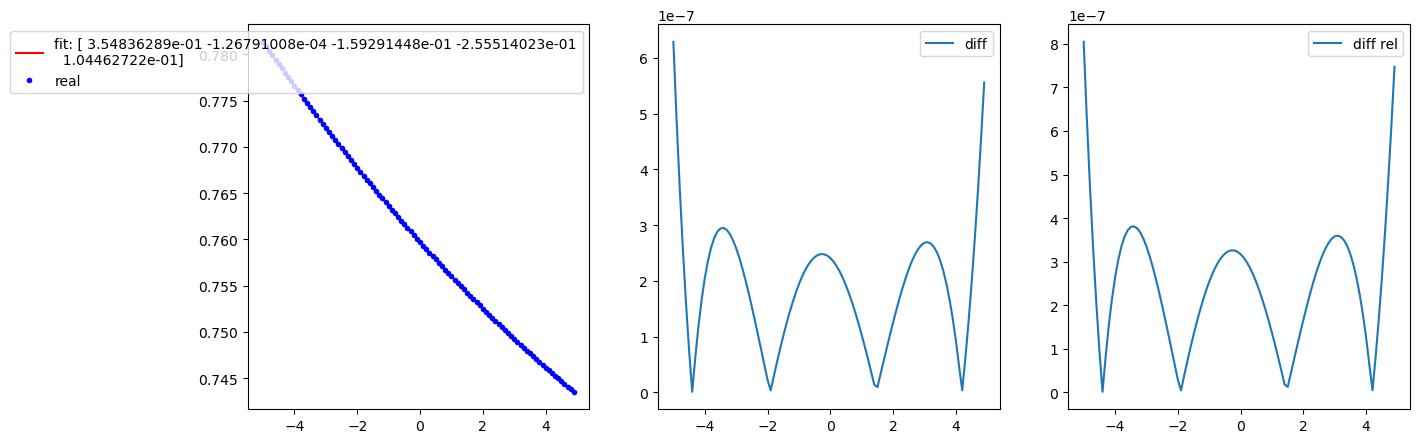

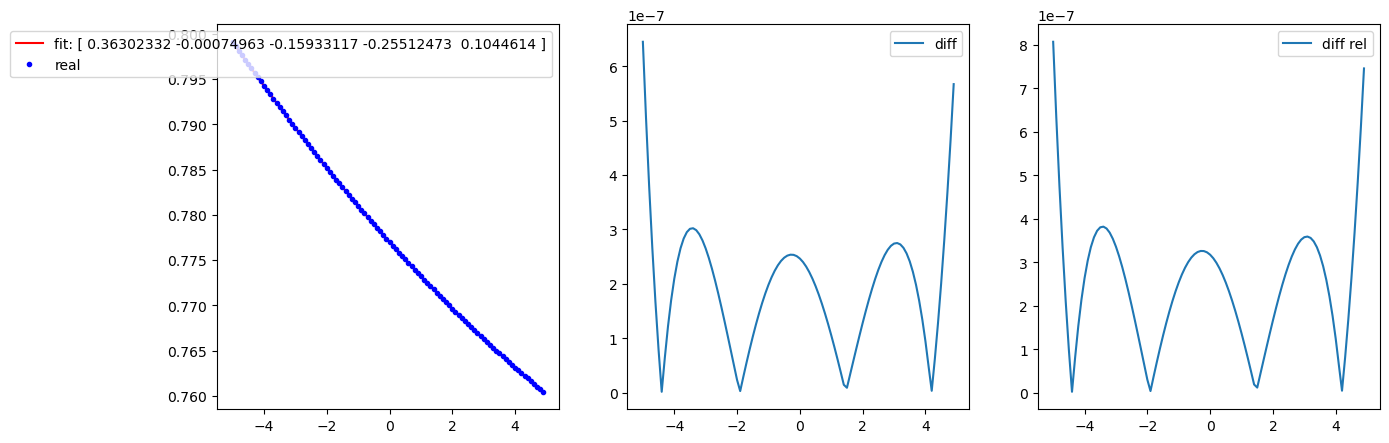

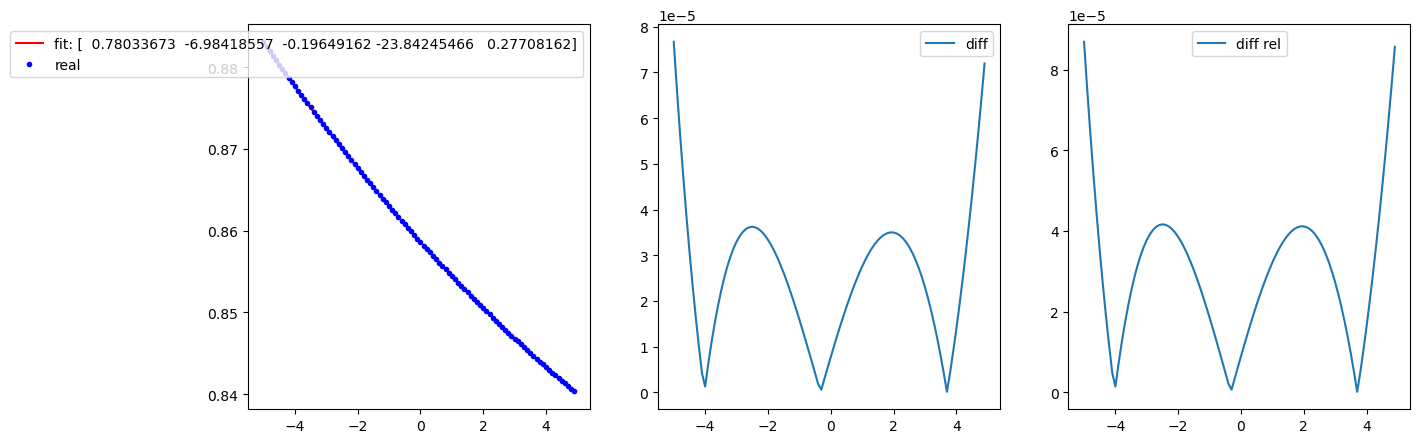

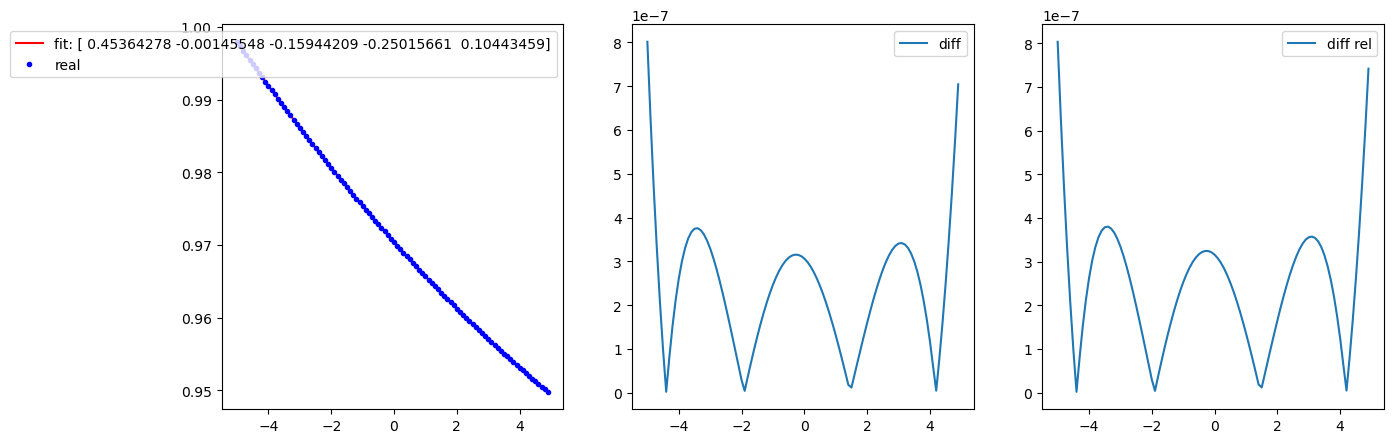

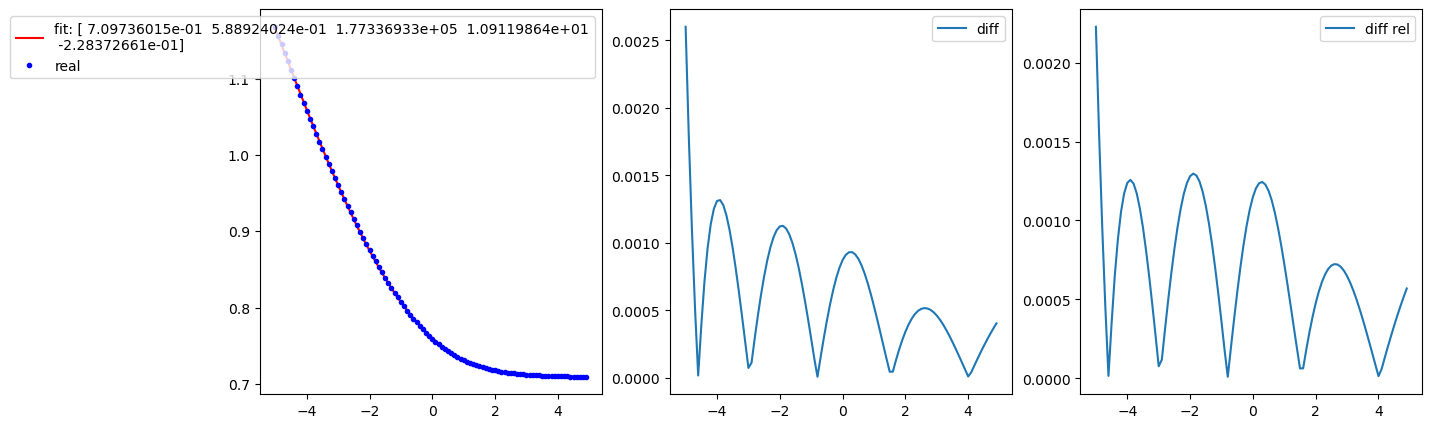

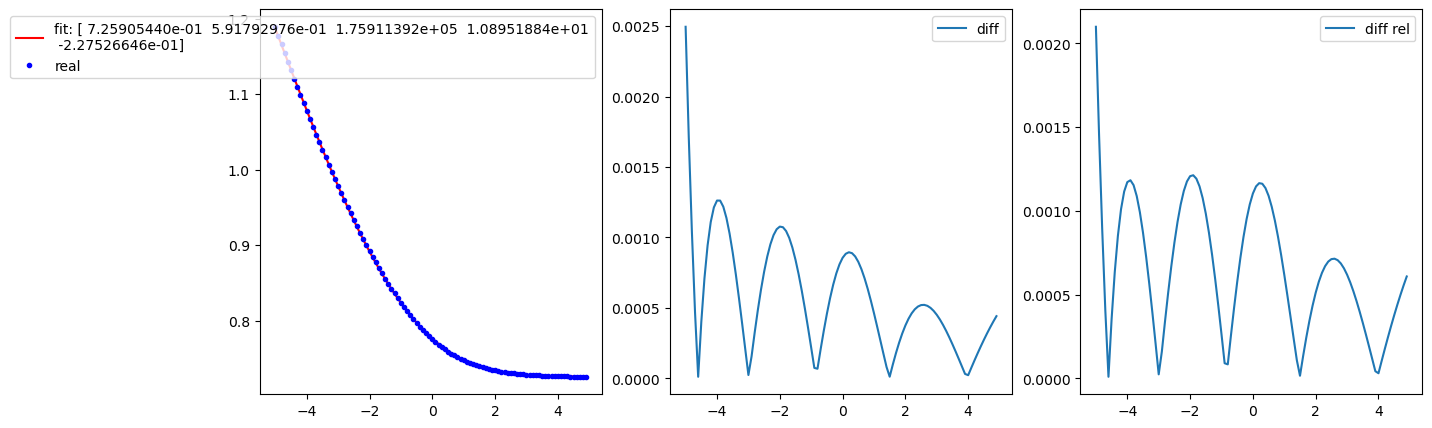

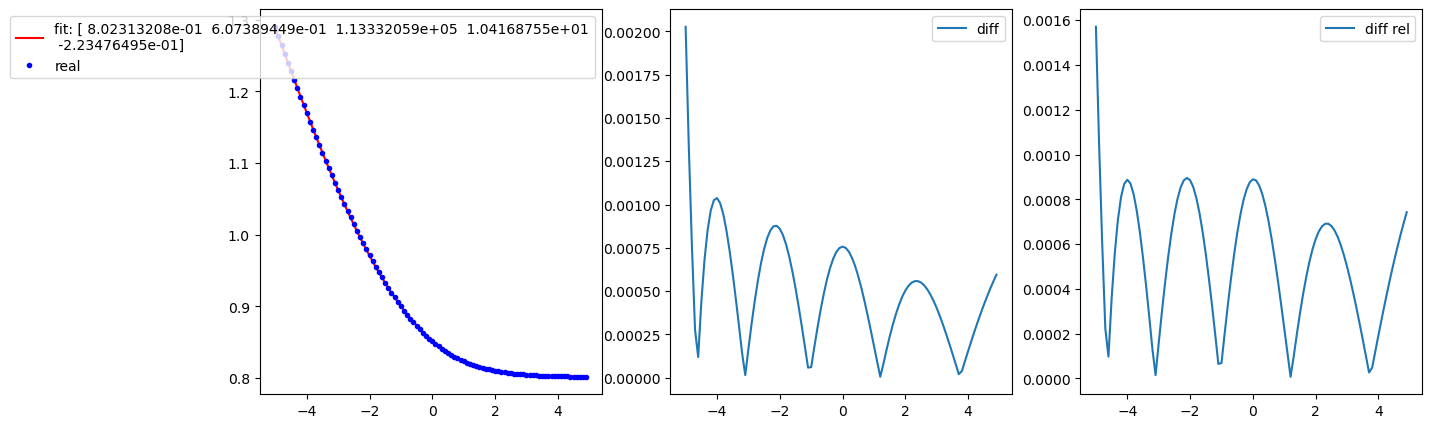

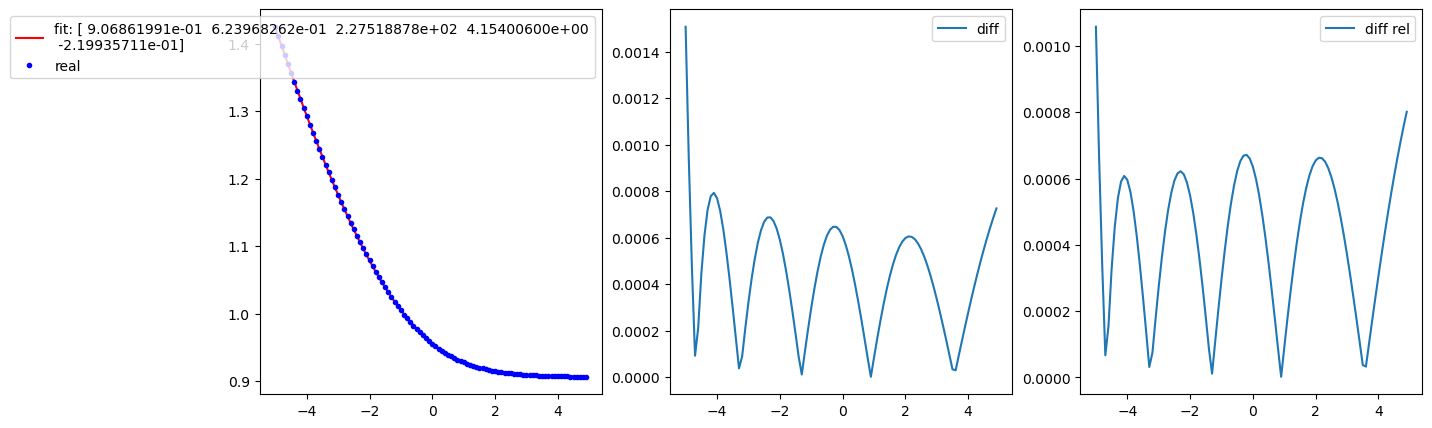

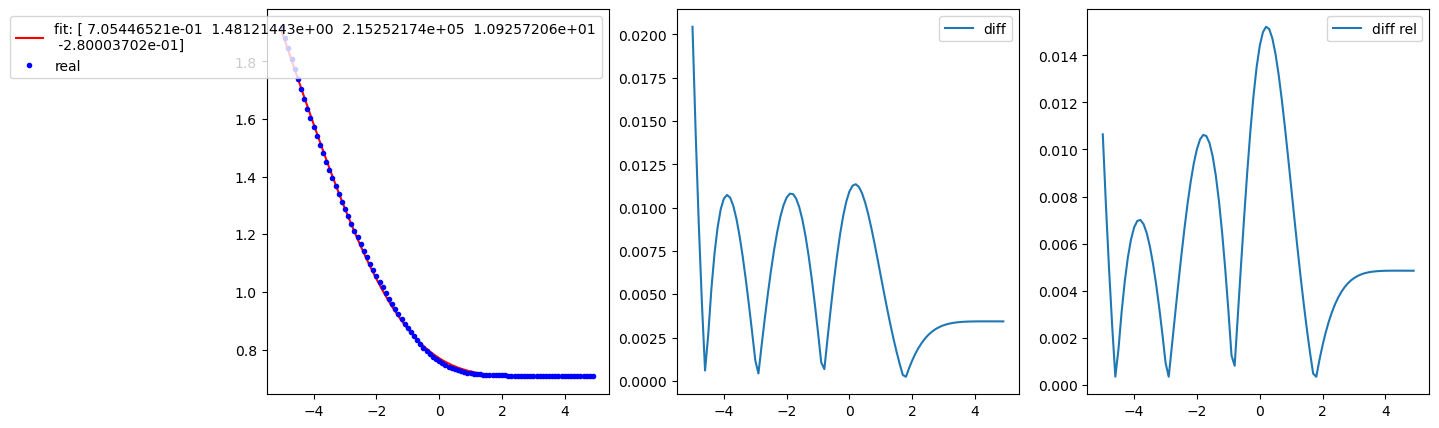

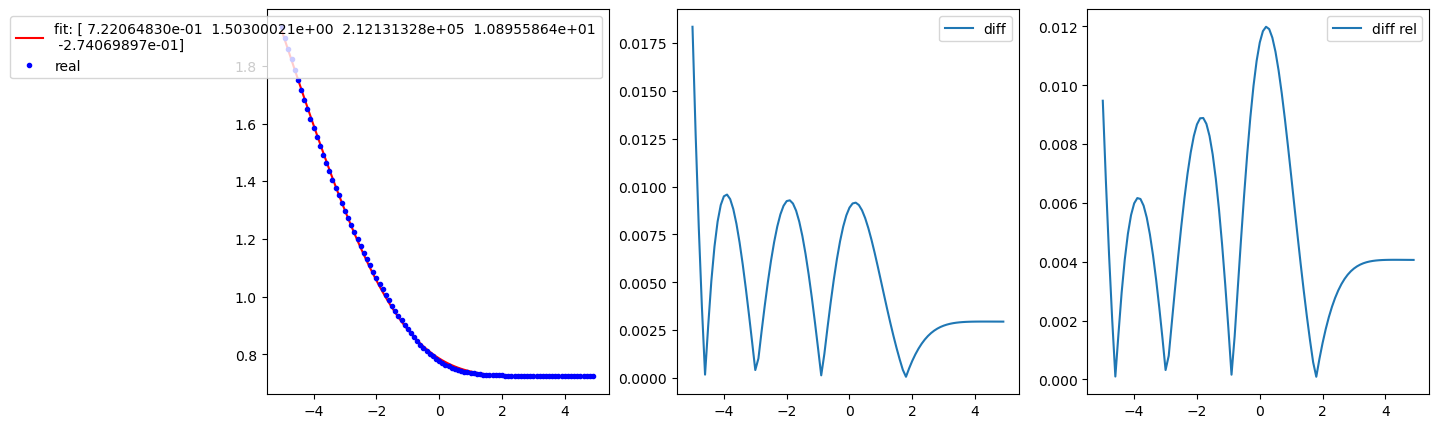

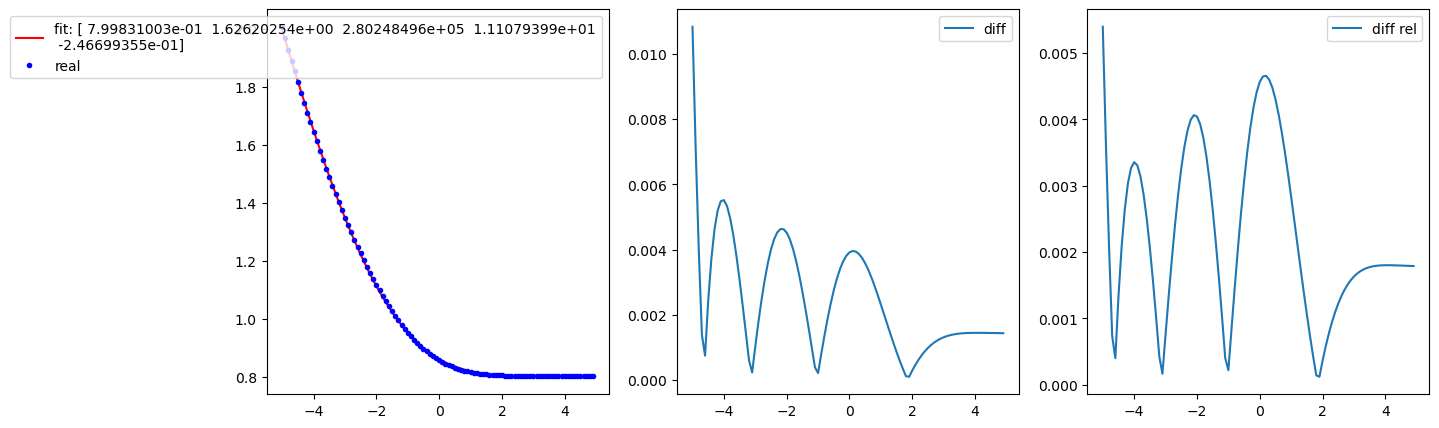

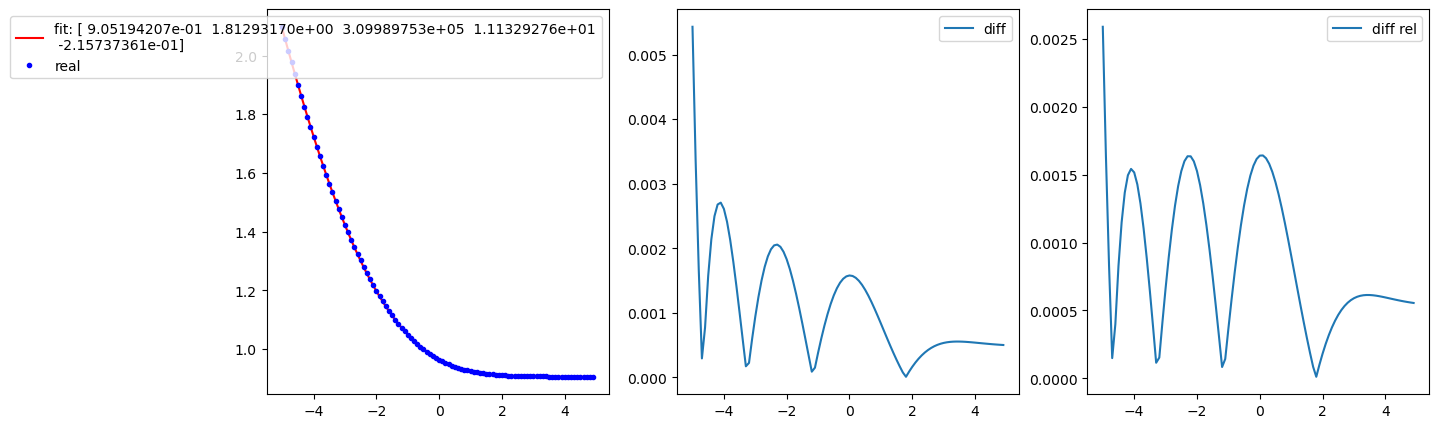

In [13]:
q0=0.001
JJ=0.01
beta=1
m=0.1
for beta in 0.1, 1, 2:
    for q0 in 0.01, 0.1, 0.5, 0.99:
        print(f"beta {beta}")
        popt, pcov, y_diff, y_diff_rel = fit(f_10rsb, f_10rsb_approx, [q0,beta,JJ, m], plot=True)


In [18]:
funct_int = lambda x: np.log(np.cosh(x))
funct_int = lambda x: log_expit(x)

def f_1rsb(h, q0, a1, b1, a2, b2):
    def f_(x):
        return 1/np.sqrt(2*np.pi*q0) * np.exp(-((x)**2)/q0)*log_expit(a1 +b1 * log_expit(b2*(x+h)+a2))
    return f_

def f_1rsb_approx(x, a0, b0, a1, b1, a2, b2):
    return a0 + b0*log_expit(a1 + b1*log_expit(a2 + b2 * (x)))


beta 2
param 3.2
param 0.29
param -1.1e+01
param 0.016
param 0.24
param 4.1


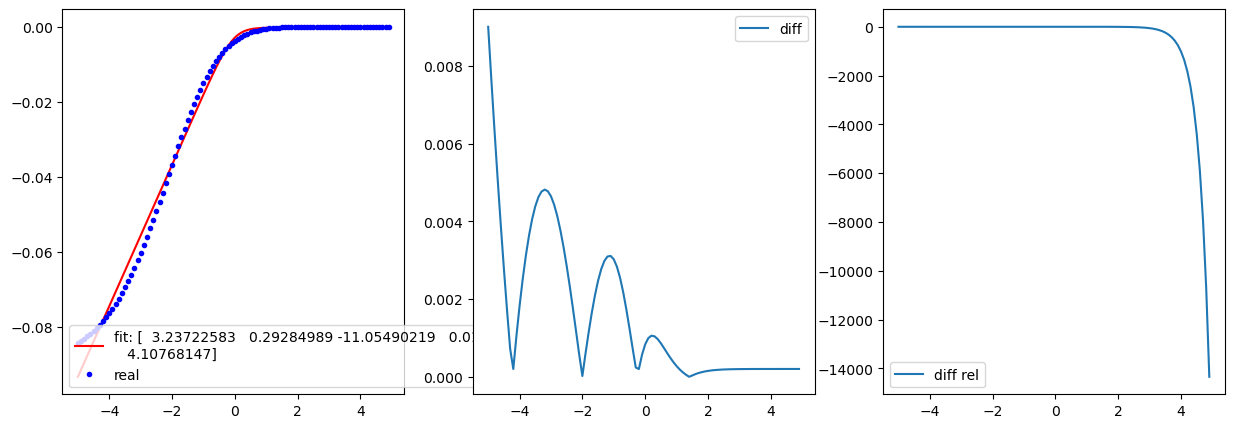

In [33]:
a1=2
b1=-3
a2=-1
b2=-1
q0=0.9
print(f"beta {beta}")
popt, pcov, y_diff, y_diff_rel = fit(f_1rsb, f_1rsb_approx, [q0,a1,b1,a2,b2], plot=True)


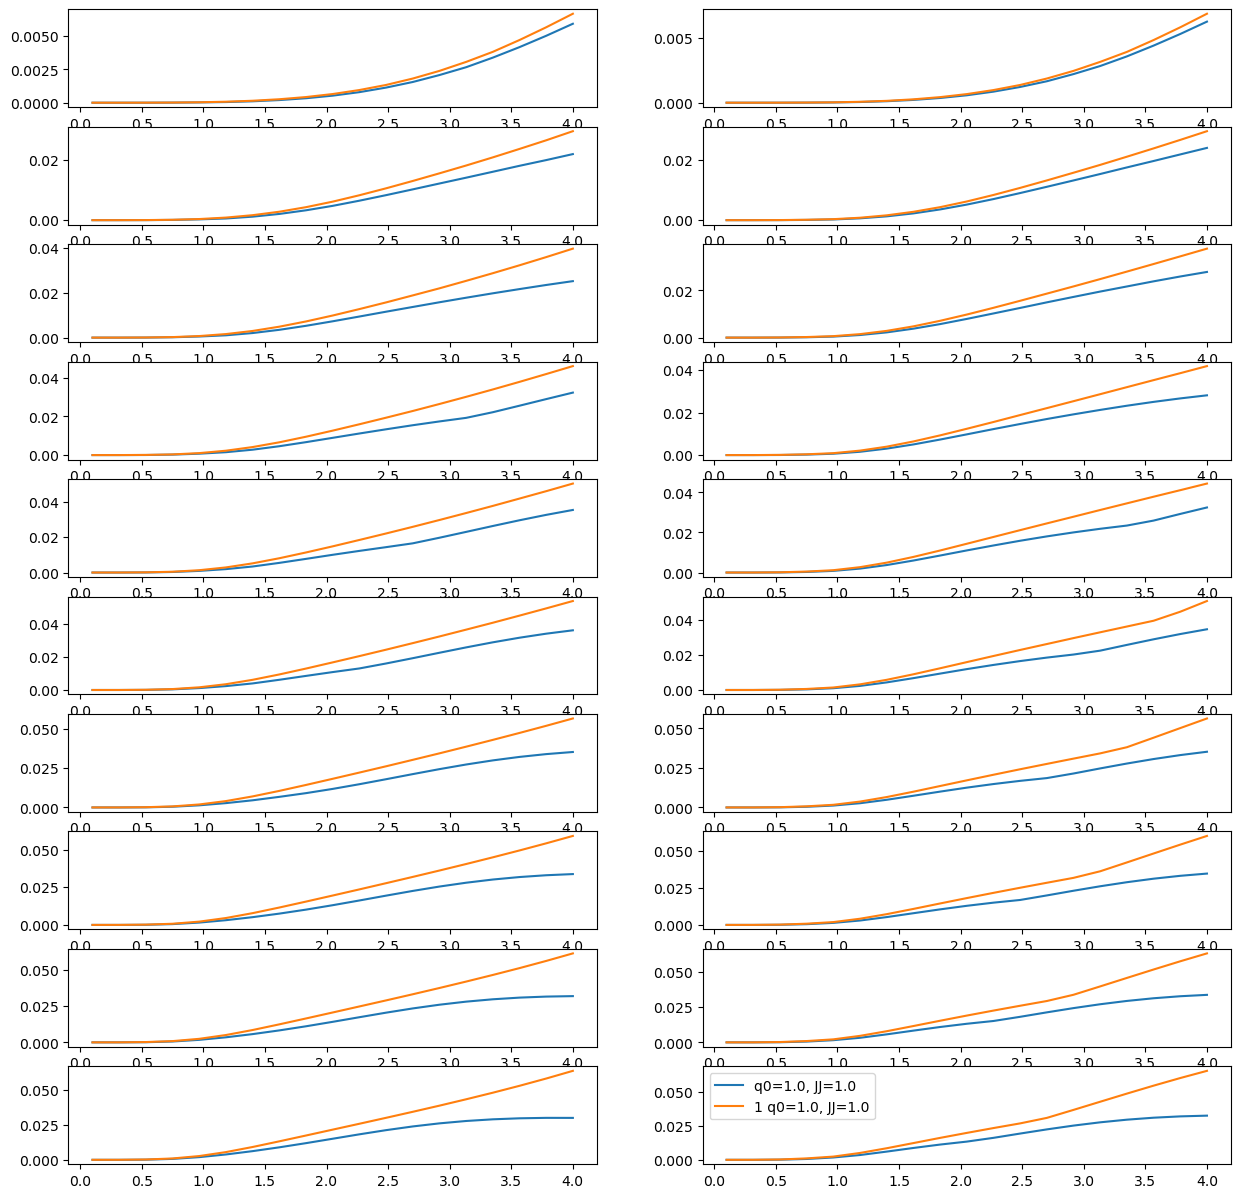

In [15]:
import matplotlib.pyplot as plt
max_rel = {}
max_rel1 = {}
q0s = np.linspace(0.01,1,10)
JJs = np.linspace(0.01,1,2)
betas= np.linspace(0.1,4,19)
for q0 in q0s:
    max_rel[q0] = {}
    max_rel1[q0] = {}
    for JJ in JJs:
        max_rel[q0][JJ] = []
        max_rel1[q0][JJ] = []
        for beta in betas:
            popt, pcov, y_diff, y_diff_rel = fit(f_rs, f_rs_approx, [q0,beta,JJ], p0=[0.01, q0,beta,JJ])
            popt1, pcov1, y_diff1, y_diff_rel1 = fit(f_rs, f_rs_approx1, [q0,beta,JJ], p0=[q0,beta,JJ])
            max_rel[q0][JJ].append(np.max(y_diff))
            max_rel1[q0][JJ].append(np.max(y_diff1))

fig, axs = plt.subplots(len(q0s), len(JJs), figsize=(15,15))
for i, q0 in enumerate(q0s):
    for ii, JJ in enumerate(JJs):
        axs[i][ii].plot(betas, max_rel[q0][JJ], label=f"q0={q0}, JJ={JJ}")
        axs[i][ii].plot(betas, max_rel1[q0][JJ], label=f"1 q0={q0}, JJ={JJ}")
plt.legend()

In [289]:
from scipy.special import log_expit, expit

funct_int = lambda x: np.cosh(x)

def f_rsb1_1(h, q0=1, beta=1, JJ=0.01, m=1):
    def f_(x):
        return (1./np.sqrt(q0)) * np.exp(-((x)**2)/q0) * (funct_int(beta*(JJ+x+h)))**m
    return f_

def f_rsb1_approx1(x, a, b, c, d, e):
    return a + b * funct_int(c*x+d)**e
    
def f_rsb1_approx12(x, b, c, d, e):
    return 1+b * funct_int(c*x+d)**e

def f_rsb1_approx13(x, b, c, d, e):
    return b * funct_int(c*x+d)**e


param -0.0058
param 1.9
param 1.8
param 0.71
param 0.56


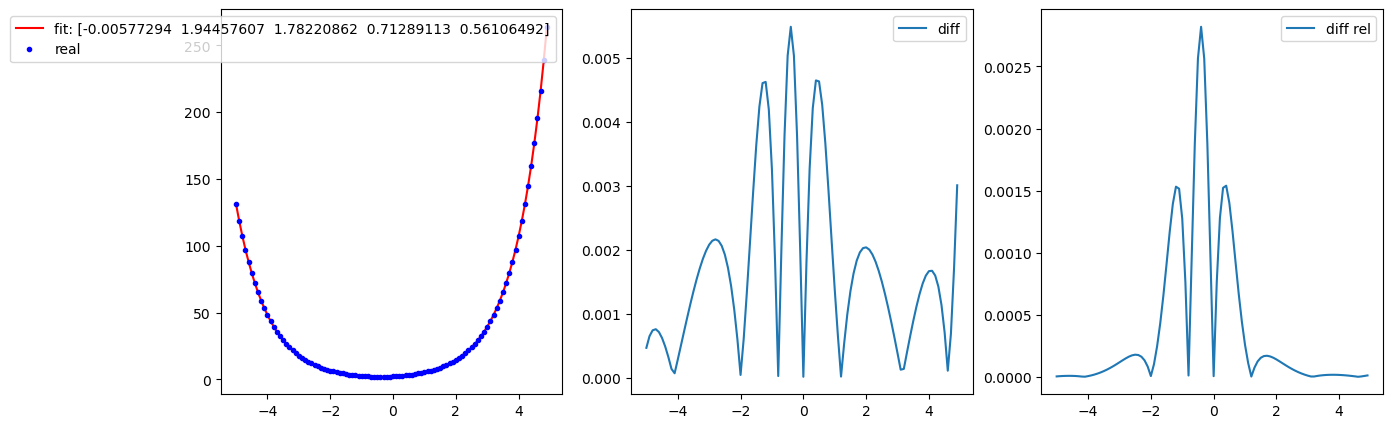

In [276]:
q0=0.2
beta=2
JJ=0.4
m=0.5
p0, _ = fit(f_rsb1_1, f_rsb1_approx1, [q0, beta, JJ, m], p0=[-1, q0, beta, JJ, m])

param 1.9
param 1.8
param 0.72
param 0.56


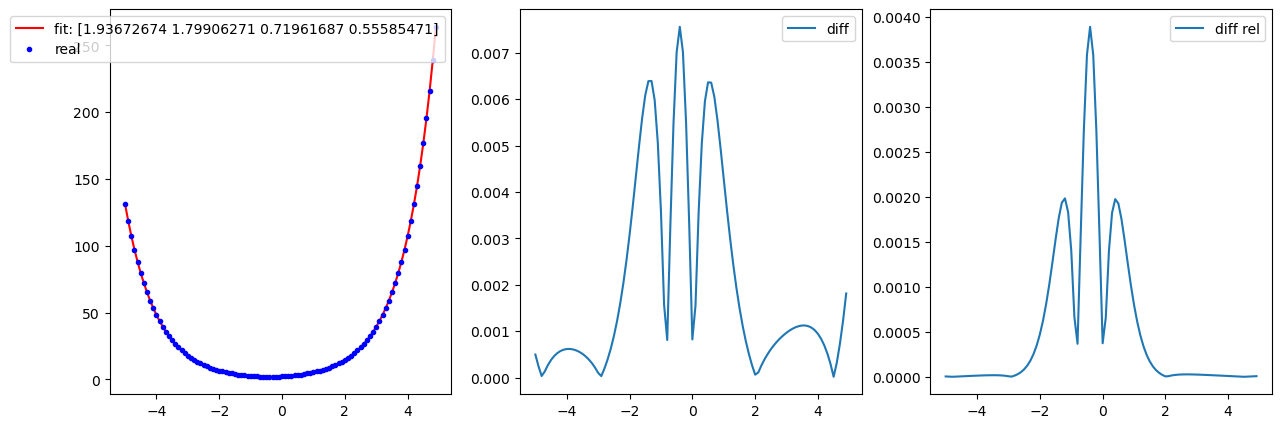

In [277]:
p0, _ = fit(f_rsb1_1, f_rsb1_approx13, [q0, beta, JJ, m], p0=p0[1:])

/var/folders/jy/gjfds_4d4xsfqkq02klzlj240000gn/T/ipykernel_16527/1412141523.py:3: RuntimeWarning: overflow encountered in cosh
  funct_int = lambda x: np.cosh(x)
/var/folders/jy/gjfds_4d4xsfqkq02klzlj240000gn/T/ipykernel_16527/1412141523.py:13: RuntimeWarning: overflow encountered in power
  return 1+b * funct_int(c*x+d)**e


param 1.4
param -8.2e+01
param -8.2e+01
param 0.016


(array([ 1.40228726e+00, -8.22411976e+01, -8.23590710e+01,  1.55270046e-02]),
 array([[4.47217370e-01, 2.43657256e+03, 2.44006465e+03, 4.60079060e-01],
        [2.43657256e+03, 1.32753137e+07, 1.32943398e+07, 2.50667434e+03],
        [2.44006465e+03, 1.32943398e+07, 1.33133932e+07, 2.51026690e+03],
        [4.60079060e-01, 2.50667434e+03, 2.51026690e+03, 4.73315842e-01]]))

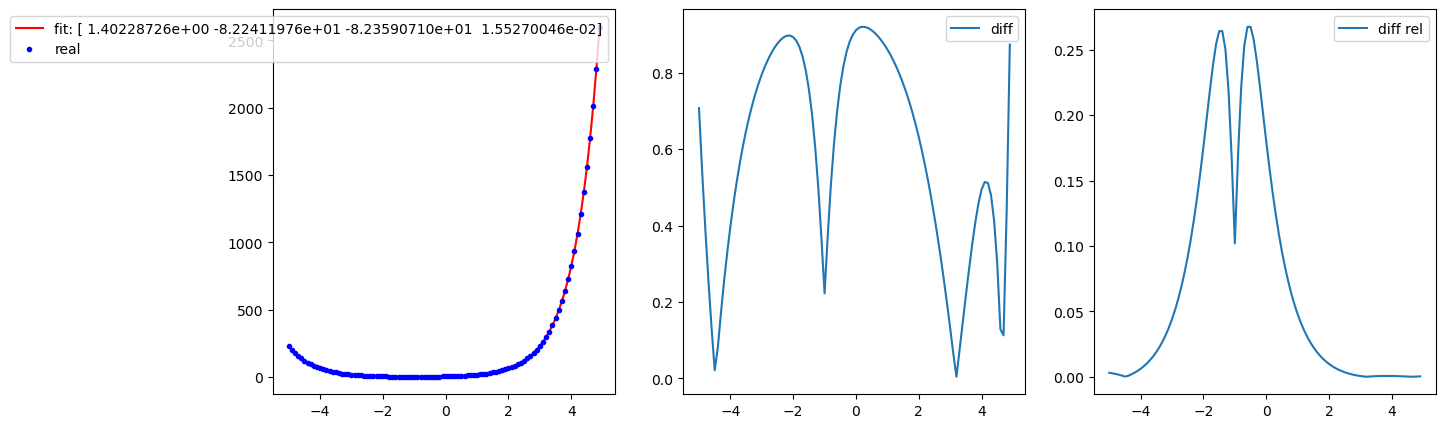

In [145]:
fit(f_rsb1_1, f_rsb1_approx12, [0.3,2.5,1, 0.51], p0=p0)

In [ ]:
from scipy.special import log_expit, expit

funct_int = lambda x: np.cosh(x)

def f_rsb1_1(h, q0=1, beta=1, JJ=0.01, m=1):
    def f_(x):
        return 1/np.sqrt(q0) * np.exp(-((x)**2)/q0) * funct_int(beta*(JJ+x+h))**m
    return f_

def f_rsb1_approx1(x, a, b, c, d, e):
    return a + b * funct_int(c*x+d)**e


In [ ]:
def f_1rsb_1(h, q0=1, a=1, b=1, c=1, d=1):
    def f_(x):
        return np.exp(-((x)**2)/q0) * log_expit(a + b * log_expit(c*(x+h) + d))
    return f_
def f_1rsb_1_approx(x, a1, b1, a2, b2, a3, b3):
    return a1 + b1 * log_expit(a2 + b2 * log_expit( a3 + b3 * x))


In [48]:
from scipy.special import log_expit, expit

funct_int = lambda x: log_expit(x)

def f_rs(h, q0=1, beta=1, JJ=0.01):
    def f_(x):
        return 1/np.sqrt(q0) * np.exp(-((x)**2)/q0) * funct_int(2*beta*(JJ+x+h))
    return f_

def f_rs_approx(x, a, b, c, d):
    return a + b * funct_int(c*x+d)


/var/folders/jy/gjfds_4d4xsfqkq02klzlj240000gn/T/ipykernel_16527/460250534.py:7: RuntimeWarning: invalid value encountered in power
  return 1/np.sqrt(q0) * np.exp(-((x)**2)/q0) * funct_int(2*beta*(JJ+x+h))**m


ValueError: array must not contain infs or NaNs

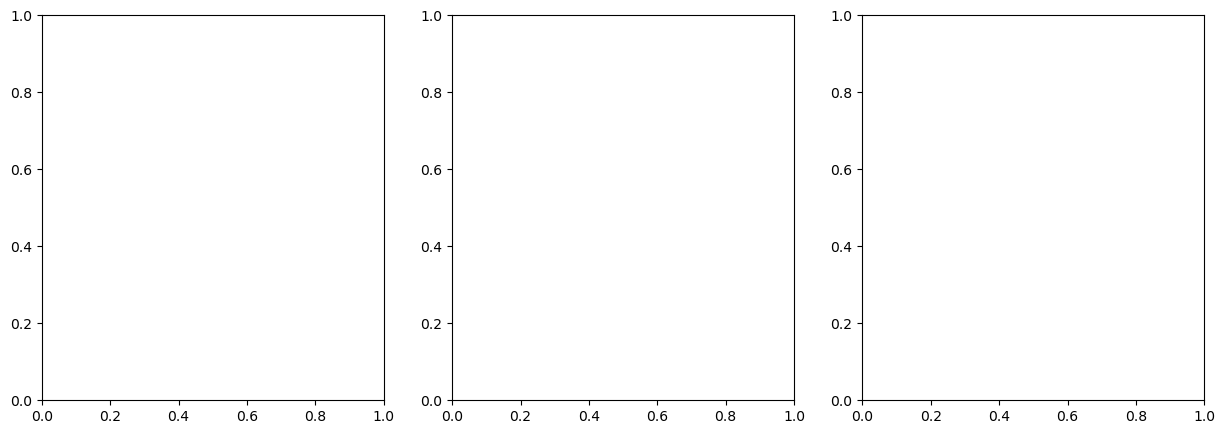

In [49]:
fit(f_rs, f_rs_approx, [0.2,2.5,1])

In [ ]:
    
def f_1rsb_0(h, q1=1, m1=0.5, m1_=1, beta=1):
    def f_(x):
        return np.exp(-((x)**2)/q1 + m1_*x + m1*log_expit(beta*(x+h)))
    return f_
def f_1rsb_0_approx(x, a, b, c, d, e):
    return a + np.exp(b + c * log_expit(d*x+e))

def f_1rsb_1(h, q0=1, a=1, b=1, c=1, d=1):
    def f_(x):
        return np.exp(-((x)**2)/q0) * log_expit(a + b * log_expit(c*(x+h) + d))
    return f_
def f_1rsb_1_approx(x, a1, b1, a2, b2, a3, b3):
    return a1 + b1 * log_expit(a2 + b2 * log_expit( a3 + b3 * x))

def f_2rsb_0(h, q0=1, a=1, b=1, c=1, d=1, e=1 ,f=1):
    def f_(x):
        return np.exp(-((x)**2)/q0) * log_expit(f + e*log_expit(a + b * log_expit(c*(x+h) + d)))
    return f_
def f_2rsb_0_approx(x, a0, b0, a1, b1, a2, b2, a3, b3):
    return a0 + b0 * log_expit(a1 + b1 * log_expit(a2 + b2 * log_expit( a3 + b3 * x)))

def f_2rsb_0_approx_serial(x, a0, b0, a1, b1, a2, b2, a3, b3):
    return a0 + b0 * log_expit(a1 + b1 * log_expit( a2 * x)) + b2 * log_expit( a3 + b3 * x)

def f_2rsb_1_approx_serial(x, a0, b0, a1, b1,a11, b11, a2,a22, b2, a3, b3):
    return a0 + b0 * log_expit(a1 + b1 * log_expit( a2 * x)) + b2 * log_expit(a11 + b11 * log_expit( a22 * x))


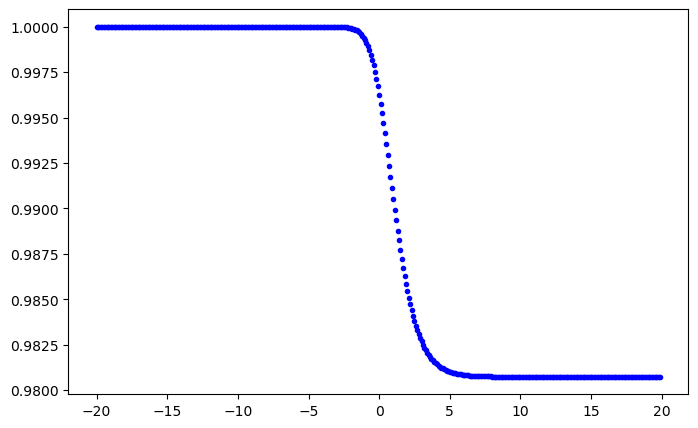

In [8]:
def f_2rsb_0_approx(x, a0, b0, a1, b1, a2, b2, a3, b3):
    return a0 + b0 * log_expit(a1 + b1 * log_expit(a2 + b2 * log_expit( a3 + b3 * x)))

plot_fit(f_2rsb_0_approx,[1, 1, 3, -3, 1, 1, -1, 1], range=20, dx=0.1 )

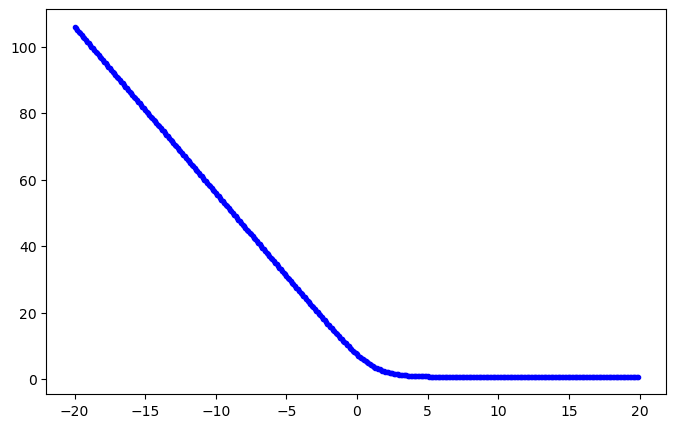

In [9]:

plot_fit(f_2rsb_0_approx_serial,[1, 1, 1, -1, 2, -5, -1, 1], range=20, dx=0.1 )

param 5.7e+03
param 4e+02
param 2.7e+01
param 4.9e+01
param 2.7e+01
param 4.9e+01
param 0.001
param 0.001
param 4e+02
param 1.0
param 1.0


/Users/ocadni/opt/anaconda3/envs/m1torch/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


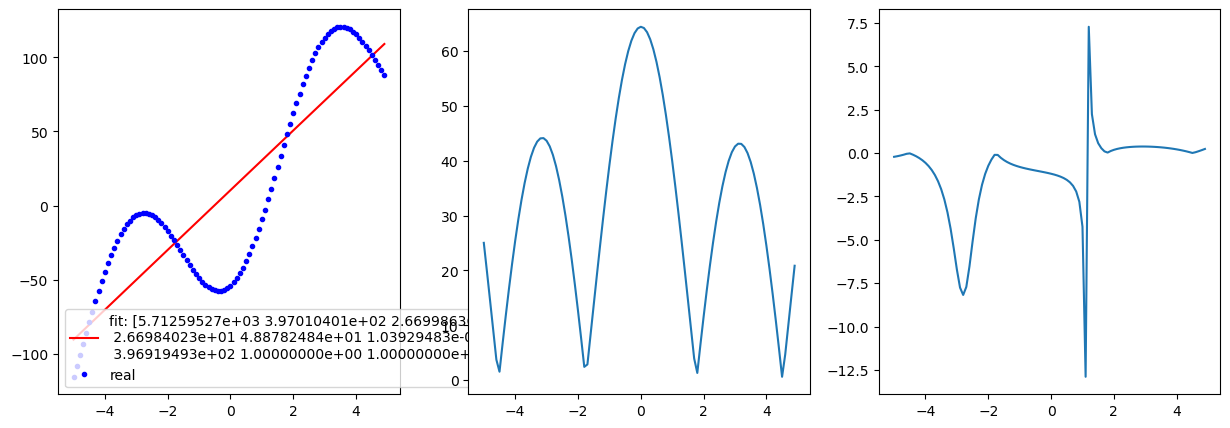

In [11]:
fit(f_cos_mon, f_2rsb_1_approx_serial, [50,1])

param -0.0026
param 0.35
param 1.0
param 1.7
param 0.44


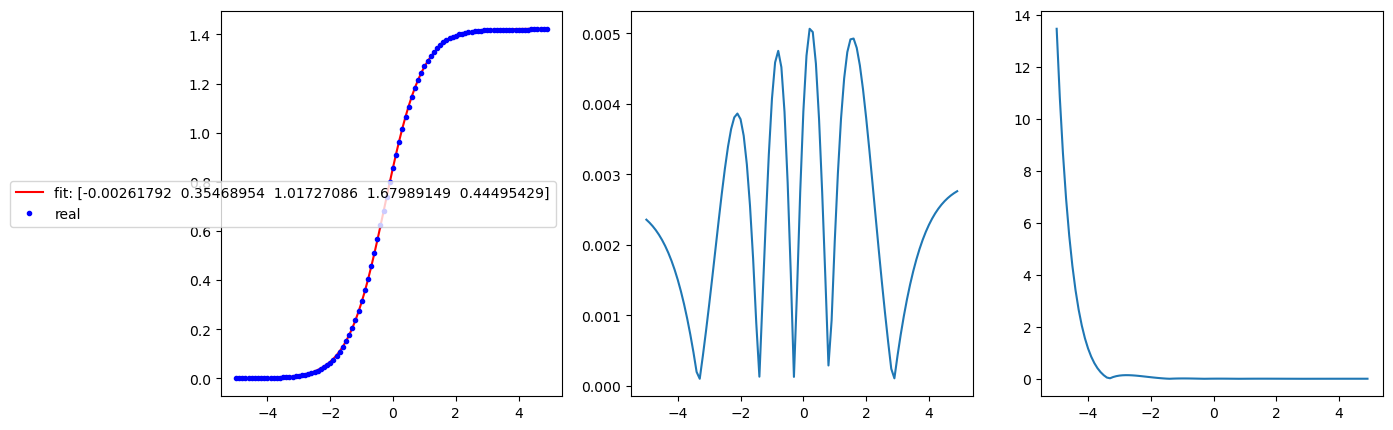

In [12]:
fit(f_1rsb_0, f_1rsb_0_approx, [0.5,1,1,2])

param -0.0024
param 0.0083
param 4.3e+01
param 5.8
param -3.2e+01
param -7.6


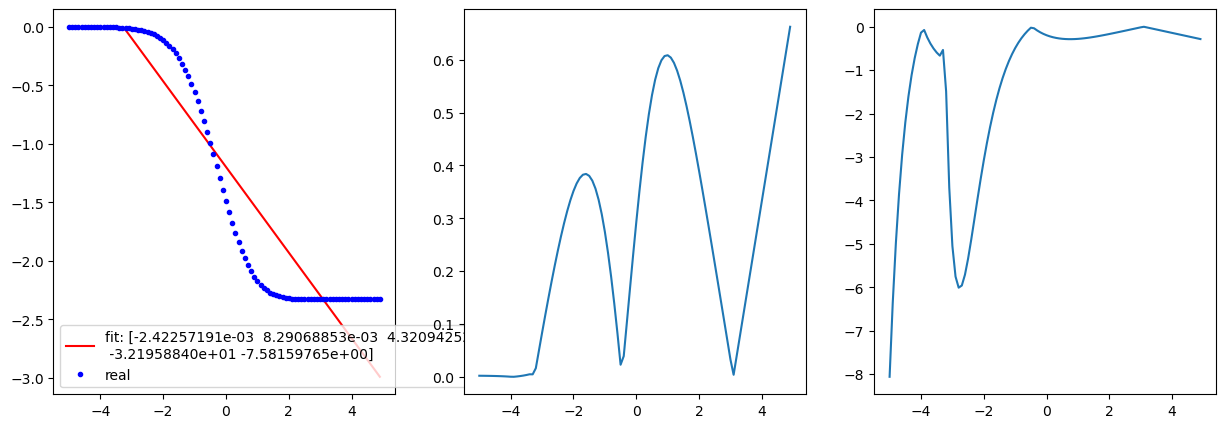

In [ ]:
fit(f_1rsb_1, f_1rsb_1_approx, [1, -1, -0.4, 5.2, -1.2])

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 100000.

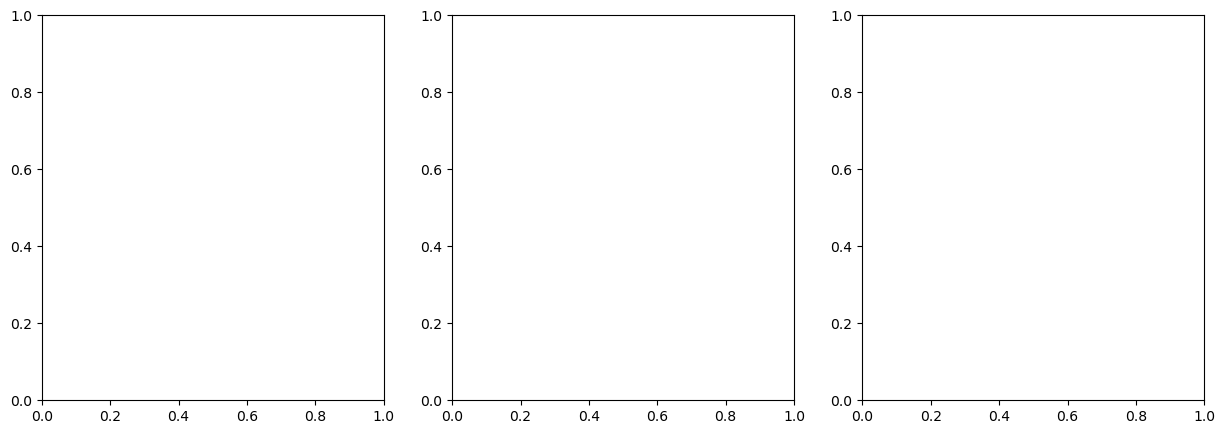

In [70]:
fit(f_2rsb_0, f_2rsb_0_approx, [1, -1, -1.4, -.1, -1, -0.3, -1])

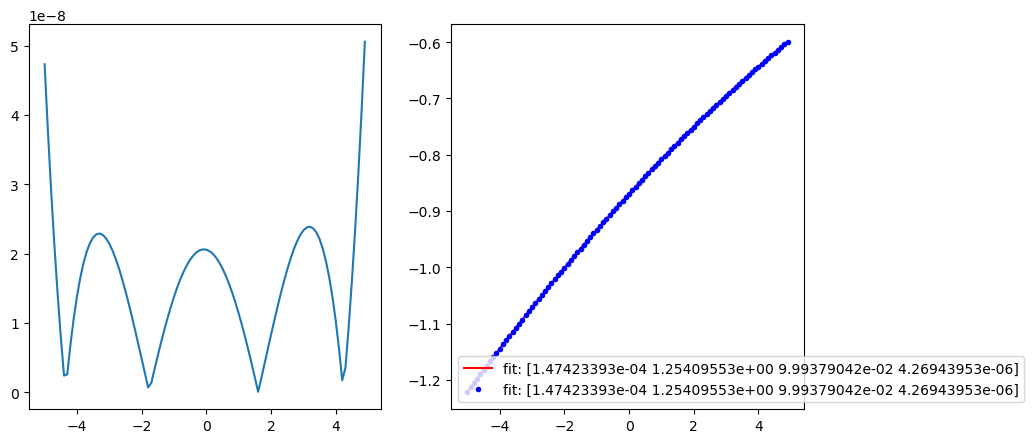

In [27]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

x = np.arange(-5,5,0.1)
true_func = f_rs
fit_func = f_rs_approx
y = []
params_true = [0.5,0.1]
for b in x:
    y.append(int_f(true_func(b, *params_true)))

popt, pcov = curve_fit(fit_func, x, y, maxfev = 100000, ftol=1e-12, xtol=1e-12, gtol=1e-12)
#plt.plot(x, 1.7*np.log(np.cosh(x))+0.4)
ax2.plot(x, fit_func(x, *popt), 'r-',
         label=f'fit: {popt}')
ax2.plot(x, y, 'b.',
         label=f'fit: {popt}')
#ax2.set_ylim(0,2)
ax1.plot(x, np.abs(fit_func(x, *popt)- y),
         label='diff')
plt.legend()

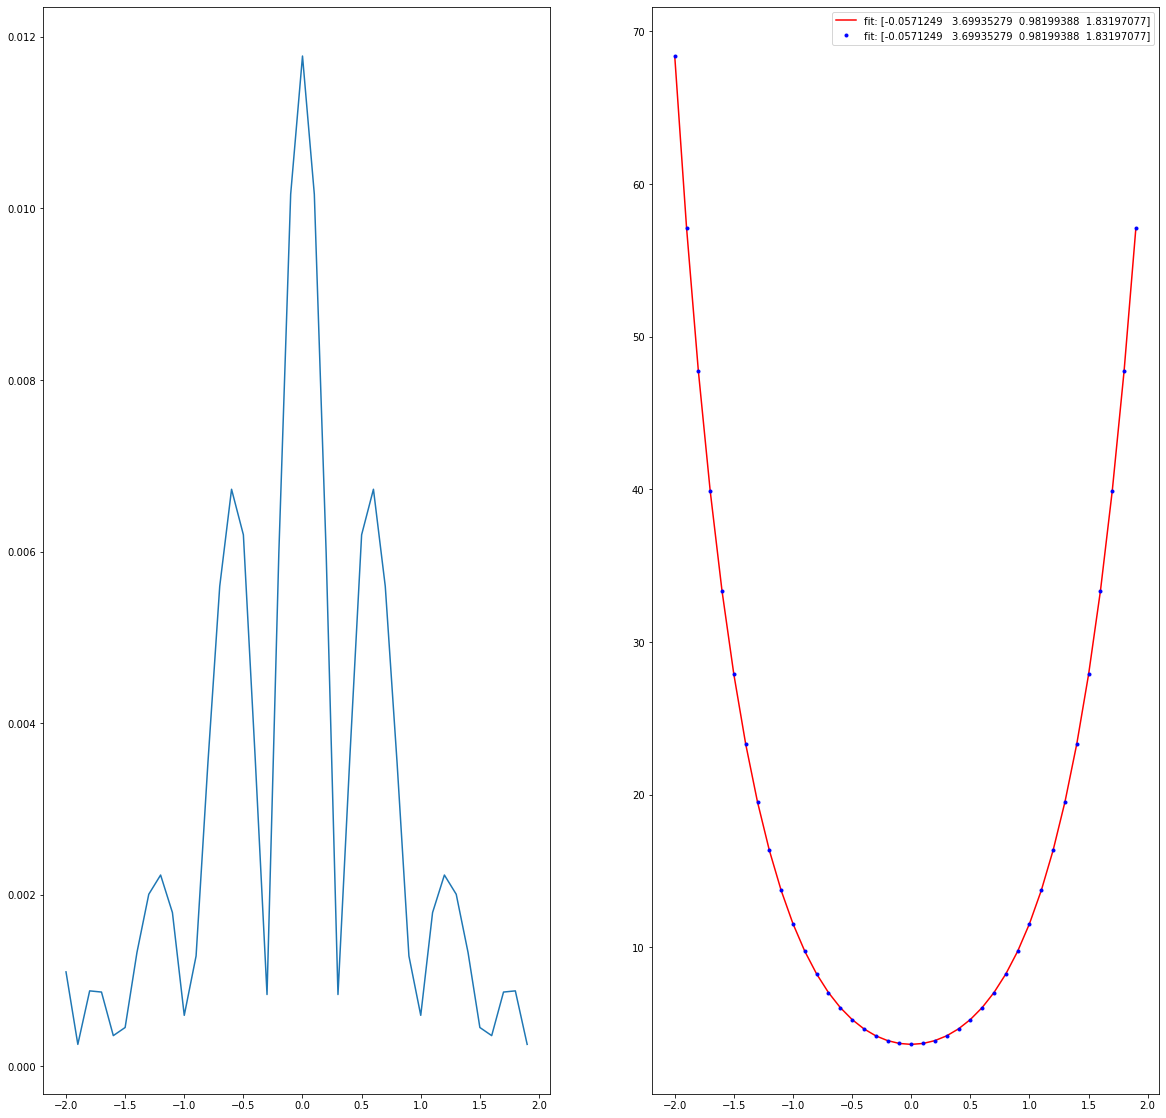

In [162]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))

x = np.arange(-2,2,0.1)
true_func = f_1rsb_0
fit_func = f_1rsb_0_approx
y = []
params_true = [0.9,0.9,2]
for b in x:
    y.append(int_f(true_func(b, *params_true)))

popt, pcov = curve_fit(fit_func, x, y, maxfev = 100000)
#plt.plot(x, 1.7*np.log(np.cosh(x))+0.4)
ax2.plot(x, fit_func(x, *popt), 'r-',
         label=f'fit: {popt}')
ax2.plot(x, y, 'b.',
         label=f'fit: {popt}')
#ax2.set_ylim(0,2)
ax1.plot(x, 100*np.abs(fit_func(x, *popt)- y)/y,
         label='diff')
plt.legend()

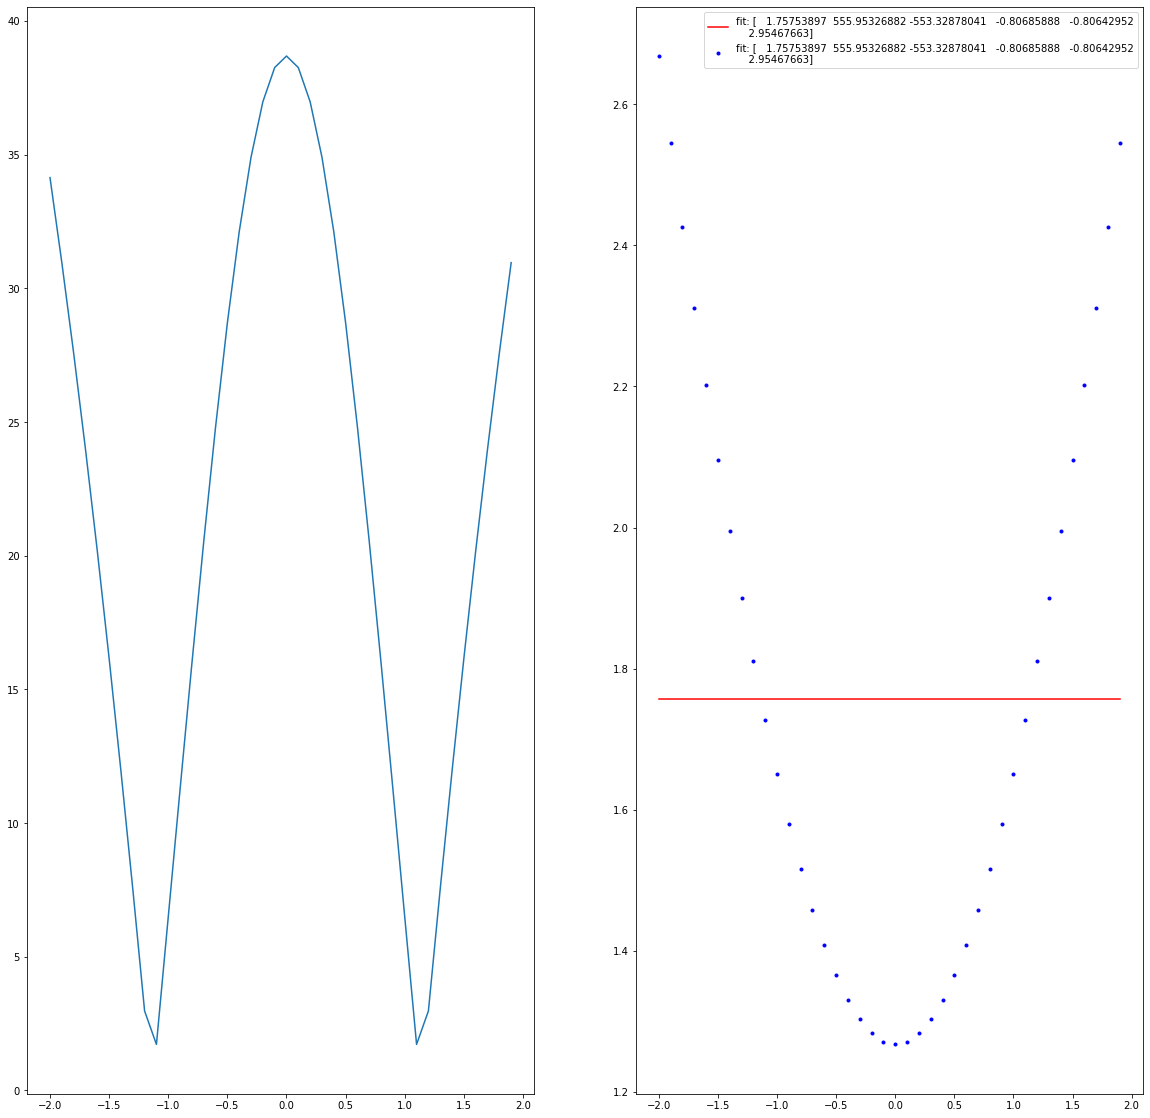

In [164]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))

x = np.arange(-2,2,0.1)
true_func = f_1rsb_1
fit_func = f_1rsb_1_approx
y = []
params_true = [0.9,0.9,1,1]
for b in x:
    y.append(int_f(true_func(b, *params_true)))

popt, pcov = curve_fit(fit_func, x, y, maxfev = 100000)
#plt.plot(x, 1.7*np.log(np.cosh(x))+0.4)
ax2.plot(x, fit_func(x, *popt), 'r-',
         label=f'fit: {popt}')
ax2.plot(x, y, 'b.',
         label=f'fit: {popt}')
#ax2.set_ylim(0,2)
ax1.plot(x, 100*np.abs(fit_func(x, *popt)- y)/y,
         label='diff')
plt.legend()

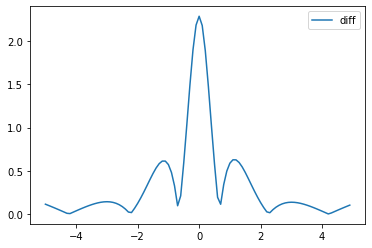

In [123]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c, d):
    return a * np.log(np.cosh(d*x+c)) + b

x = np.arange(-5,5,0.1)
y = []
h0=0
a=1
for b in x:
    y.append(int_f(f(b, h0, a)))

#plt.plot(x,y)
xx=np.arange(-1,1,0.01)
yy=0.65*xx**2+0.4
#plt.plot(xx,yy)
xxx=np.arange(1,5,0.01)
yyy=1.8*xxx-1
#plt.plot(xxx,yyy)
x2=np.arange(-5,5,0.01)
popt, pcov = curve_fit(func, x, y)
#plt.plot(x, 1.7*np.log(np.cosh(x))+0.4)
#plt.plot(x, func(x, *popt), 'r-',
#         label='fit: a=%5.3f, b=%5.3f, c=%5.3f,d=%5.3f,' % tuple(popt))
plt.plot(x, 100*np.abs(func(x, *popt)- y)/y,
         label='diff')
plt.legend()

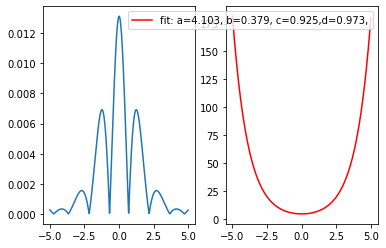

In [99]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

fig, (ax1, ax2) = plt.subplots(1, 2)

def func_m(x, a, b, c, d):
    return (a * np.cosh(c*x) + b)**d

x = np.arange(-5,5,0.01)
y = []
h0=0
a=2
m=0.9
c=0.2
for b in x:
    y.append(int_f(f_m(b, h0=h0, a=a, m=m, c=c), dx=0.01))

#plt.plot(x,y)
popt, pcov = curve_fit(func_m, x, y, maxfev = 100000, p0=[1,0.1,1,m])
#plt.plot(x, 1.7*np.log(np.cosh(x))+0.4)
ax2.plot(x, func_m(x, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f,d=%5.3f,' % tuple(popt))
ax1.plot(x, 100*np.abs(func_m(x, *popt)- y)/y,
         label='diff')
plt.legend()

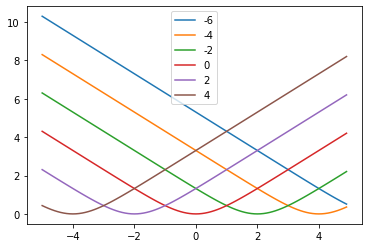

In [66]:
bb = np.arange(-6,6,2)
y = []
for b in bb:
    x = np.arange(-5,5,0.1)
    y = f1(b,x)
    plt.plot(x,y, label=f"{b}")
plt.legend()
